In [1]:
from bioframe import vis
import bioframe as bf
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
data_path = '/scratch/groups/horence/angelika/EM_expression/data/'
processed_path = './processed_files/'

In [3]:
matrices_paths = glob(processed_path+'E*tsv')

In [4]:
matrices_paths

['./processed_files/ENSG00000122068.13.tsv',
 './processed_files/ENSG00000274276.4.tsv',
 './processed_files/ENSG00000241860.7.tsv',
 './processed_files/ENSG00000129484.14.tsv',
 './processed_files/ENSG00000225138.8.tsv',
 './processed_files/ENSG00000228463.10.tsv',
 './processed_files/ENSG00000180902.18.tsv']

In [225]:
k = 2
df = pd.read_csv(matrices_paths[k], sep='\t')
reads_df = pd.read_csv(matrices_paths[k]+'.dread', sep='\t')
name = matrices_paths[k].split('/')[-1][:-4]
df.iloc[:,1:] = df.iloc[:,1:]/1000

In [226]:
name

'ENSG00000241860.7'

In [227]:
reads_df

,chrom,start,end,cell_0,cell_1,cell_2,cell_3
0,chr1,141474,143011,6,20,80,49
1,chr1,146386,149707,86,82,58,43
2,chr1,155767,155831,57,6,13,42
3,chr1,164263,164791,95,85,28,14
4,chr1,165491,165942,27,25,54,20
5,chr1,167129,168165,21,88,31,18
6,chr1,168610,168767,29,34,49,52
7,chr1,169049,169264,65,27,87,96
8,chr1,172557,172688,8,43,78,92
9,chr1,173753,173862,77,91,31,85


In [228]:
exon_dfs = [df[df['exon_' + str(i)] > 0].iloc[:,:3].copy() for i in range(len(df.columns)-3)]

In [229]:
for i in range(len(df.columns)-3):
    exon_dfs[i].loc[ :, 'level']=i
    exon_dfs[i].loc[ :, 'label']='iso_'+str(i)

In [230]:
exons_concat = pd.concat(exon_dfs).reset_index(drop=True)

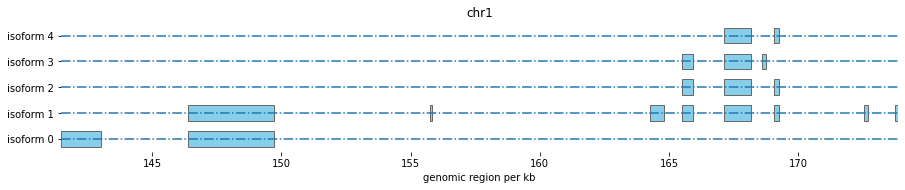

In [231]:
xlim = df.iloc[0].start, df.iloc[-1].end
vis.plot_intervals(exons_concat, xlim=xlim, levels= exons_concat.level.values, figsize=(15, min(5, 10*len(df.columns)/len(df))), show_coords=True)
plt.xlabel('genomic region per kb')
y = np.arange(0, len(df.columns)-3)
ylabels = ['isoform ' + str(i) for i in y]
plt.yticks(ticks=y, labels=ylabels);
plt.hlines(y, linestyle ='-.', xmin=xlim[0], xmax=xlim[1])
# plt.title(name+' isophorms')

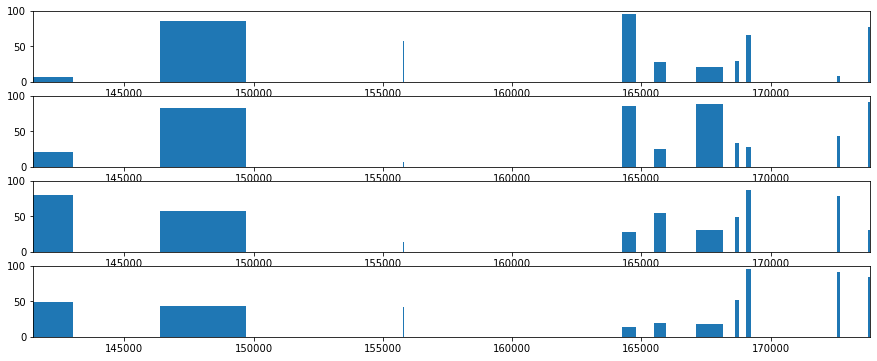

In [232]:
plt.figure(figsize=(15, 6))

n_types = len(reads_df.columns)-3
for i in range(n_types):
    plt.subplot(n_types, 1, i+1)
    plt.bar((reads_df.start+reads_df.end)/2, reads_df.iloc[:,i+3], width=reads_df.end-reads_df.start)
    plt.ylim([0, 100])
    plt.margins(0)

In [233]:
from EM import EM

Text(0.5, 0, 'steps')

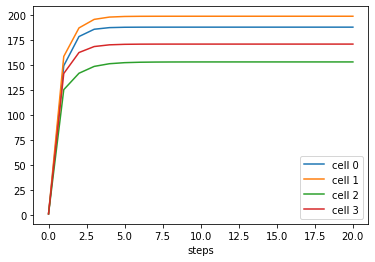

In [239]:
for cell in range(n_types):
    model = EM(reads=reads_df.iloc[:,cell+3].values, isoforms= df.iloc[:,3:].values)
    model.train(steps=20)
    plt.plot(model.scores, label='cell '+str(cell))
    
plt.legend()
plt.xlabel('steps')

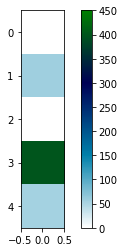

In [235]:
plt.imshow(model.O[::-1], cmap='ocean_r', vmin=0, vmax=450)
plt.colorbar()

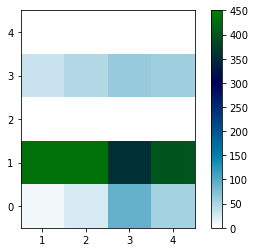

In [236]:
abundances = []
for cell in range(n_types):
    model = EM(reads=reads_df.iloc[:,cell+3].values, isoforms= df.iloc[:,3:].values)
    model.train(steps=20)
    abundances.append(model.O[::-1].reshape(-1))

abundances = np.stack(abundances)
plt.imshow(abundances.T, cmap='ocean_r', vmin=0, vmax=450)
yticks = np.arange(0,abundances.shape[1])
xticks = np.arange(0, abundances.shape[0])
plt.yticks(ticks=yticks, labels = yticks[::-1])
plt.xticks(ticks=xticks, labels = xticks+1)
plt.colorbar()

In [205]:
abundances

array([[1.12776531e-12, 3.23498839e+01, 2.13299508e-10, 4.31186909e+02,
        7.46320666e+00],
       [1.02741502e-10, 4.45659738e+01, 5.12018778e-09, 4.32054082e+02,
        2.43799438e+01],
       [1.54843409e-08, 6.15419317e+01, 1.53139146e-05, 3.55544060e+02,
        9.19139925e+01],
       [1.16746202e-09, 5.67173752e+01, 2.22512281e-08, 4.00159627e+02,
        5.41229978e+01]])